# Predicting Loan Status

Insurance stream is one of the largest use of data analytics method when compared to other fields. This domain gives the challenging part of working on the data from the insurance company. This is the classification dataset, which mainly depends on the type of strategies used, and variable that plays an important role in the target variable. It needs to be predicted about the loan eligibility process based on a few variables such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. This dataset contains 614 rows and 13 columns. The dataset has one target variable, whereas 12 descriptive features. The target variable here is to check if an individual has got their loan sanction or not.

The target variable is of two types of levels; 

* y - the person got their loan sanctioned
* n - the person failed to get their loan sanction.

This dataset contains 12 descriptive variables:

* Loan_ID: continuous
* Gender: male and female
* Dependents: 0, 1, 2 and 3+
* Education: Graduate and Not Graduate
* Self_Employed: yes and no
* ApplicantIncome: continuous
* Co-applicantIncome: continuous
* LoanAmount: continuous
* Loan_Amount_Term: continuous
* Credit_History: 0 and 1
* Property_Area: Rural, Urban and semiurban


This report is organized as follows:
- [Section 2 (Overview)](#2) Methodology is outlined. 
- [Section 3 (Data Preparation)](#3) summarizes data preparation process and our Model Evaluation Strategy. 
- [Section 4 (Hyperparameter Tuning)](#4) describes the hyperparameter tuning process for each classification algorithm.
- [Section 5 (Performance Comparison)](#5) presents model performance comparison results.
- [Section 6 (Limitations)](#6) limitations of our approach. 
- [Section 7 (Summary)](#7) Brief summary of our work in this project.


# Overview <a class="anchor" id="2"></a> 

## Methodology

We build the following binary classifiers to predict the target feature:

* K-Nearest Neighbors (KNN),
* Decision trees (DT), and
* Naive Bayes (NB).

The transformation process includes encoding categorical descriptive features for target and descriptive respectively.  All the observations are taken into consideration and the data is split into 70:30 ratio, where 70 refers to training sets and 30 is the test sets.

Random Forest method is used to check the best feature. 10,20 and all the features are given to select the best feature out of the dataset. To tune with hyperparameters, feature selection is pipelined with hyperparameter search. Then, the 5 fold is conducted with 2 repetitions.

From the training data, the best model is identified from KNN, NB, and DT respectively. 5-fold cross-validation is performed on the test data, following with the paired t-test to check if it is statistically significant or not. Moreover, all the classifiers are compared to check the scores and confusion matrices.


# Data Preparation <a class="anchor" id="3"></a> 

## Loading Dataset

Firstly, important packages are loaded into the notebook along with the dataset used in the project. The shape attribute displays the dimensions of the dataset. It returns 614 rows and 13 columns.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sb
import sklearn
import matplotlib.pyplot as plt

data = pd.read_csv('loan-prediction.csv')

print("Shape of the Dataset :" )
print(data.shape)
print("\n")
print("Column Values:")
print(data.columns.values)

Shape of the Dataset :
(614, 13)


Column Values:
['Loan_ID' 'Gender' 'Married' 'Dependents' 'Education' 'Self_Employed'
 'ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'
 'Credit_History' 'Property_Area' 'Loan_Status']


## Checking for Missing Values

The dataset might contain missing values and handling them is one of the important tasks. It is noticed that a few columns contain missing values. They are processed further with ffill method that processes with forward filling all the NaN values.

In [2]:
print(data.isna().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [3]:
data.fillna(method='ffill',inplace = True)

In [4]:
import numpy as np
data.fillna(np.mean(data['LoanAmount']),inplace=True)

In [5]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Checking White Spaces and Changing to lower cases

The dataset carries a number of string observations which leads in difficulty to examine them. Many observations may contain whitespaces and uppercase that results in an error when processed further. So, the solution is to remove whitespace and convert all the string into the lower case string.

In [6]:
def noWhiteSpace(data):
    return data.strip()

In [7]:
def lower(data):
    return data.lower()

## Summary Statistics

Describe function gives the summary statistics of the dataset. In order to show the summary statistics of both numeric and character column, a variable is added that is labeled as include=’all’. The summary statistics for the dataset are as below:

In [8]:
data.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001743,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,500,400,354,480,528,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,147.381729,341.628664,0.835505,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,87.440893,65.656819,0.371027,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,167.750000,360.000000,1.000000,NaN,NaN


## Encoding Features

In the dataset, variables might be in the form of categorical data. These variables are in the form of string values. Regardless of what the value is used for, the data must be ready for the model hence, they need to be converted into numerical data instead of categorical data. So, the label encoder is used for ordinal values. i.e, property area and hence processed further. 

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le_fit = le.fit(data['Property_Area'])
data['Property_Area'] = le_fit.transform(data['Property_Area'])

The variable loan_id has no effect on the target variable, so they are removed.

In [10]:
data=data.drop(columns='Loan_ID')

### Encoding the Target Feature

The loan_status is dropped because all the descriptive features are assigned to one. We assign the loan_status, the target variable to Target.  This will be easy to predict further. The observations in the Target variables are replaced by 1 and 0 for Y and N respectively.

In [11]:
Data = data.drop(columns='Loan_Status')
Target = data['Loan_Status']
Target.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [12]:
Target = Target.replace({'Y': 1, 'N': 0})
Target.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

### Encoding Categorical Descriptive Features


Machine learning algorithms mainly work on numerical variables.  This dataset consists of several non-numeric values. In this situation, it is converted into numerical values from categorical before processing further.

In [13]:
categorical_cols = Data.columns[Data.dtypes==object].tolist()

In [14]:
Data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
dtype: object

In [15]:
categorical_cols

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed']

By using pd.get_dummies() function, specific columns can be given to be encoded. Therefore, numbers of new column will appear in the frame with their names corresponding to the original column and its values.

In [16]:
for col in categorical_cols:
    n = len(Data[col].unique())
    if (n == 2):
        Data[col] = pd.get_dummies(Data[col], drop_first=True)
   
# use one-hot-encoding for categorical features with >2 levels
Data = pd.get_dummies(Data)

## Scaling of Features

Min-Max Scaler is used to shrinks the range of all the values 0-1. The prediction will be good if the values are under one range.

In [17]:
from sklearn import preprocessing

Data_df = Data.copy()

Data_scaler = preprocessing.MinMaxScaler()
Data_scaler.fit(Data)
Data = Data_scaler.fit_transform(Data)

In [18]:
pd.DataFrame(Data, columns=Data_df.columns).sample(5, random_state=999)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
424,1.0,1.0,0.0,0.0,0.182189,0.000000,0.125904,0.743590,1.0,0.5,1.0,0.0,0.0,0.0
452,1.0,1.0,0.0,0.0,0.046976,0.041592,0.202605,0.743590,0.0,0.0,1.0,0.0,0.0,0.0
343,1.0,1.0,1.0,0.0,0.037390,0.000000,0.094067,0.743590,1.0,0.5,0.0,0.0,0.0,1.0
603,1.0,0.0,0.0,0.0,0.043612,0.103223,0.235890,0.743590,1.0,0.0,1.0,0.0,0.0,0.0
444,1.0,1.0,0.0,0.0,0.088844,0.199990,0.240232,0.615385,1.0,0.0,1.0,0.0,0.0,0.0


## Feature Selection & Ranking



The Random forest can be used for classification because it is simple and easy to perform. It randomly creates decision trees on data and predicts the best solution based on each tree. It selects the one which has more highest numbers. Best Features are selected with the RandomForest classifiers and later fitted into the model.

In [19]:
from sklearn.ensemble import RandomForestClassifier

num_features = 10
RF_Model = RandomForestClassifier(n_estimators=100)
RF_Model.fit(Data_df, Target)
fs_rf = np.argsort(RF_Model.feature_importances_)[::-1][0:num_features]

best_features = Data_df.columns[fs_rf].values
best_features

array(['Credit_History', 'ApplicantIncome', 'LoanAmount',
       'CoapplicantIncome', 'Property_Area', 'Loan_Amount_Term',
       'Education', 'Married', 'Gender', 'Dependents_0'], dtype=object)

Displays all the values of the Best Features selected.

In [20]:
feature_importances = RF_Model.feature_importances_[fs_rf]
feature_importances

array([0.23608004, 0.21256592, 0.19276995, 0.11688089, 0.04991205,
       0.04454846, 0.02613057, 0.02175963, 0.02045362, 0.01813189])

In [21]:
import seaborn as sns
def plot_imp(best_features, scores, method_name, color):
    
    dataframe = pd.DataFrame({'features': best_features, 
                       'importances': scores})
    
    fig, ax = plt.subplots(figsize =(15,5))
    g= sns.barplot(ax=ax, x = "features" , y = "importances" , data= dataframe)
    g.set_xticklabels(ax.get_xticklabels(),rotation = 30) 

The important features are plotted in order to visualize the best one.

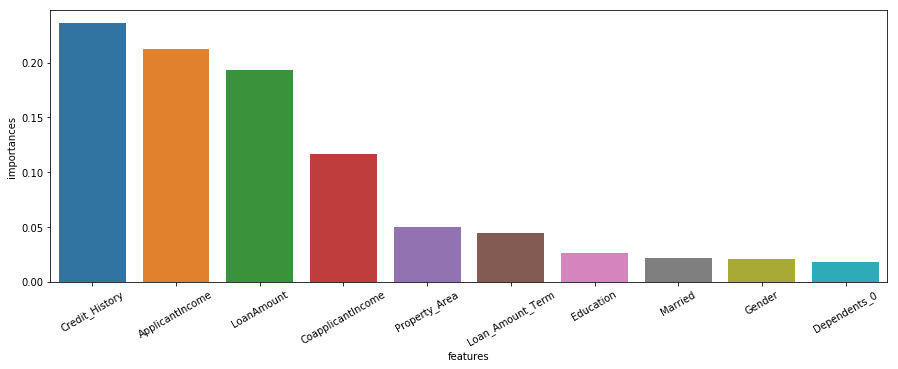

In [22]:
plot_imp(best_features, feature_importances, 'Random Forest', 'green')

It is noticed that the most important feature is credit_history, followed by ApplicantIncome, LoanAmount, and Coapplicantincome.

## Data Sampling & Train-Test Splitting



The dataset here has merely 614 rows, which do not need data sampling. Therefore, all the rows are taken into consideration. It is split into 70:30 of train and test data. It requires two types of the dataset, one to train the model and another to test the performance of our model.

In [23]:
from sklearn.model_selection import train_test_split

Data_train, Data_test, \
target_train, target_test = train_test_split(Data, Target, 
                                                    test_size = 0.3, random_state=999)

print(Data_train.shape)
print(Data_test.shape)

(429, 14)
(185, 14)


## Model Evaluation Strategy


The training data is trained using a certain algorithm and used to predict the outcome with the train data. Here, the 5-fold  stratified cross-validation evaluation method is used with 2 repetitions for hyperparameter tuning.

In [24]:
from sklearn.model_selection import RepeatedStratifiedKFold,GridSearchCV

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=2, 
                                    random_state=999)

# Hyperparameter Tuning <a class="anchor" id="4"></a> 

## K-Nearest Neighbors (KNN)

KNN algorithm is the simple one that selects the case which is near with similarity case. RFI is used for feature selection with the estimators of about 100. RFI feature selection is combined with KNN neighbors and labeled as params_pipe_KNN in order to find the best parameters.

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin

class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        RF_Model = RandomForestClassifier(n_estimators=100)
        RF_Model.fit(X, y)
        self.fs_indices_ = argsort(RF_Model.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]


KNN is classifiers is passed along with the Best Features and the neighbors ranging from (1,10,20,40,60,100) along with p values from (1 or 2).

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

pipe_KNN = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('knn', KNeighborsClassifier())])

params_pipe_KNN = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                   'knn__n_neighbors': [1, 10, 20, 40, 60, 100],
                   'knn__p': [1, 2]}

gs_pipe_KNN = GridSearchCV(estimator=pipe_KNN, 
                           param_grid=params_pipe_KNN, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-1,
                           scoring='roc_auc',
                           verbose=1) 

In [27]:
gs_pipe_KNN.fit(Data_train, target_train);

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    8.0s finished
c:\users\santo\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In KNN, the best neighbors are 40, p is 2 and combination of best features is 10

In [28]:
gs_pipe_KNN.best_params_

{'knn__n_neighbors': 40, 'knn__p': 2, 'rfi_fs__n_features_': 10}

The optimal KNN model is given with the value of 0.7285.


In [29]:
gs_pipe_KNN.best_score_

0.7285105087582271

Scores of all models combinations

In [30]:
# custom function to format the search results as a Pandas data frame
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

In [31]:
results_KNN = get_search_results(gs_pipe_KNN)
results_KNN.head()

,mean_score,std_score,max_score,min_score,knn__n_neighbors,knn__p,rfi_fs__n_features_
21,0.728567,0.049259,0.826923,0.644231,40.0,2.0,10.0
12,0.727718,0.048574,0.794231,0.644720,20.0,1.0,10.0
13,0.721757,0.055202,0.809936,0.614103,20.0,1.0,20.0
14,0.721757,0.055202,0.809936,0.614103,20.0,1.0,14.0
18,0.720281,0.057671,0.833116,0.635897,40.0,1.0,10.0


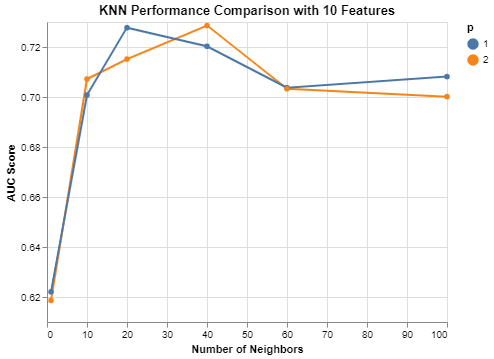

In [32]:
import altair as alt
alt.renderers.enable('notebook')

results_KNN_10_features = results_KNN[results_KNN['rfi_fs__n_features_'] == 10.0]

alt.Chart(results_KNN_10_features, 
          title='KNN Performance Comparison with 10 Features'
         ).mark_line(point=True).encode(
    alt.X('knn__n_neighbors', title='Number of Neighbors'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('knn__p:N', title='p')
)

## (Gaussian) Naive Bayes (NB)

The Naive Bayes is one of the simplest classification technique which also works well in large dataset. This predicts by calculating the probabilities of each attribute. Power transformation is performed on the input dataset before fitting the model. The Pipeline is build on Best features got from Random Forest and NB classsifiers. Optimization of var_smoothing (a variant of Laplace smoothing) is done, initially, the value of the parameter will be $10^{-9}$. GridSearch is performed on logspace sourced by NumPy.

In [33]:
from sklearn.preprocessing import PowerTransformer
Data_train_transformed = PowerTransformer().fit_transform(Data_train)

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

pipe_NB = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                     ('nb', GaussianNB())])

params_pipe_NB = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                  'nb__var_smoothing': np.logspace(1,-3, num=200)}

n_iter_search = 20
gs_pipe_NB = RandomizedSearchCV(estimator=pipe_NB, 
                          param_distributions=params_pipe_NB, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          n_iter=n_iter_search,
                          verbose=1) 

gs_pipe_NB.fit(Data_train_transformed, target_train);

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    3.0s finished


In [35]:
gs_pipe_NB.best_params_

{'rfi_fs__n_features_': 10, 'nb__var_smoothing': 0.006669919663030122}

In [36]:
gs_pipe_NB.best_score_

0.7050526324320326

The optimal NB yields an AUC score of 0.7050526 with 10 features, comparing the scores with the KNN which is slightly more but at this stage, we can only conclude after performing the paired t-tests on the various combination in the later part.

In [37]:
results_NB = get_search_results(gs_pipe_NB)
results_NB.head()

,mean_score,std_score,max_score,min_score,rfi_fs__n_features_,nb__var_smoothing
17,0.705076,0.075040,0.821154,0.609615,10.0,0.006670
7,0.694756,0.073404,0.822436,0.609615,10.0,0.018464
2,0.694136,0.068974,0.821154,0.609615,10.0,0.001383
1,0.693969,0.073544,0.815385,0.605128,10.0,0.410266
3,0.693505,0.068955,0.818590,0.605769,10.0,0.283310


Let's visualize the search results.

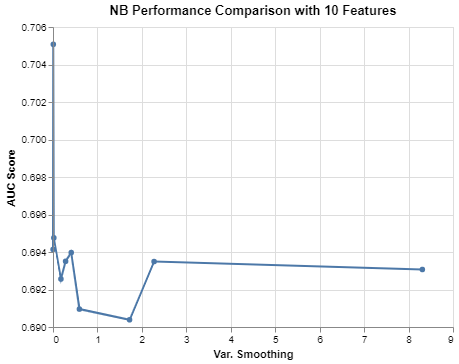

In [38]:
alt.renderers.enable('notebook')
results_NB_10_features = results_NB[results_NB['rfi_fs__n_features_'] == 10.0]


alt.Chart(results_NB_10_features, 
          title='NB Performance Comparison with 10 Features'
         ).mark_line(point=True).encode(
    alt.X('nb__var_smoothing', title='Var. Smoothing'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False))
)

## Decision Trees (DT)

The Decision tree is a tree-like structure where an internal node describes a feature, the branch signifies a decision rule, and each leaf node symbolizes the outcome. The decision tree is built with the help of the Gini index to increase the information gain.

In [39]:
from sklearn.tree import DecisionTreeClassifier

pipe_DT = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('dt', DecisionTreeClassifier(criterion='gini'))])

params_pipe_DT = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                  'dt__max_depth': [3, 4, 5],
                  'dt__min_samples_split': [2, 5]}

gs_pipe_DT = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_DT.fit(Data_train, target_train);

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.


Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-2)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-2)]: Done 180 out of 180 | elapsed:    2.7s finished
c:\users\santo\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [40]:
gs_pipe_DT.best_params_

{'dt__max_depth': 5, 'dt__min_samples_split': 5, 'rfi_fs__n_features_': 10}

In [41]:
gs_pipe_DT.best_score_

0.6759519145927229

The best DT has a maximum depth of 5 and a minimum split value of 5 samples with an AUC score of 0.675951. At this stage, Both the KNN and DT have the higher AUC. But we can conclude only after the paired t-test is performed
A visualization of the search results is given below.

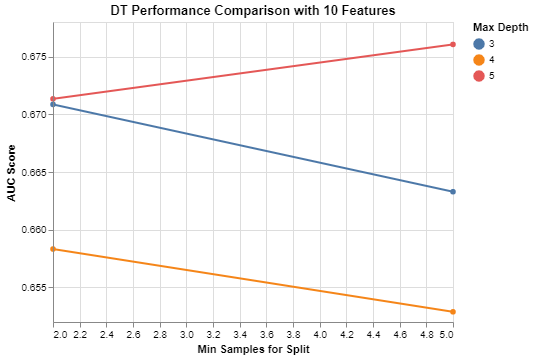

In [42]:
results_DT = get_search_results(gs_pipe_DT)

results_DT_10_features = results_DT[results_DT['rfi_fs__n_features_'] == 10.0]

alt.Chart(results_DT_10_features, 
          title='DT Performance Comparison with 10 Features'
         ).mark_line(point=True).encode(
    alt.X('dt__min_samples_split', title='Min Samples for Split'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('dt__max_depth:N', title='Max Depth')
)

## Further Fine Tuning


DT has recorded low optimal value compared to the other two classifiers, Further we are trying not to miss out on better values for DT. For this reason, we try to implement new search as below,

In [43]:
params_pipe_DT2 = {'rfi_fs__n_features_': [10],
                  'dt__max_depth': [5, 10, 15],
                  'dt__min_samples_split': [5, 50, 100, 150]}

gs_pipe_DT2 = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT2, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_DT2.fit(Data_train, target_train);

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.


Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-2)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-2)]: Done 120 out of 120 | elapsed:    1.8s finished
c:\users\santo\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [44]:
gs_pipe_DT2.best_params_

{'dt__max_depth': 10, 'dt__min_samples_split': 100, 'rfi_fs__n_features_': 10}

In [45]:
gs_pipe_DT2.best_score_

0.7035759890551286

As suspected, we can achieve slightly better results with the new search space. The AUC score is 0.70357598 with max depth of 10 and min split of 100 with 10 best features.

In [46]:
results_DT = get_search_results(gs_pipe_DT2)
results_DT

,mean_score,std_score,max_score,min_score,dt__max_depth,dt__min_samples_split,rfi_fs__n_features_
6,0.703605,0.084258,0.826923,0.575641,10.0,100.0,10.0
10,0.703605,0.084258,0.826923,0.575641,15.0,100.0,10.0
5,0.694648,0.077871,0.832464,0.575000,10.0,50.0,10.0
2,0.692872,0.076300,0.826923,0.577564,5.0,100.0,10.0
9,0.685450,0.076918,0.825945,0.573077,15.0,50.0,10.0
7,0.685026,0.066437,0.756519,0.553846,10.0,150.0,10.0
11,0.683648,0.067933,0.756519,0.553846,15.0,150.0,10.0
1,0.677934,0.086986,0.863755,0.561859,5.0,50.0,10.0
3,0.671088,0.069835,0.756519,0.553846,5.0,150.0,10.0
0,0.666825,0.075509,0.826923,0.542308,5.0,5.0,10.0


We again observe that the cross-validated AUC score difference between the hyperparameter combinations is not really much. A visualization of the new search results is shown below.

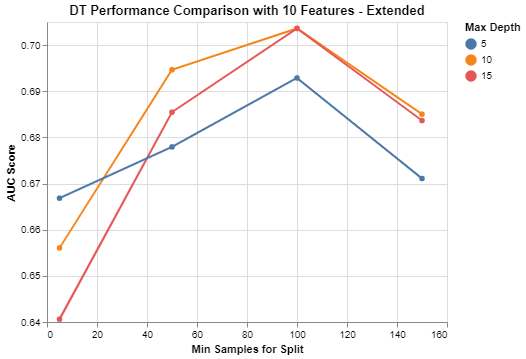

In [47]:
results_DT_10_features = results_DT[results_DT['rfi_fs__n_features_'] == 10.0]

alt.Chart(results_DT_10_features, 
          title='DT Performance Comparison with 10 Features - Extended'
         ).mark_line(point=True).encode(
    alt.X('dt__min_samples_split', title='Min Samples for Split'),
    alt.Y('mean_score', title='AUC Score', scale=alt.Scale(zero=False)),
    alt.Color('dt__max_depth:N', title='Max Depth')
)

# Performance Comparison <a class="anchor" id="5"></a> 


The training data in all three classifiers were optimized and fit the optimized model on the test data. This is processed through cross-validation. The pairwise t-test is performed rather than the cross-validation because it is a random process. Pairwise t-tests are used to discover the performance difference of classifiers are statistically significant or not. 5-fold cross-validation is performed without any repetitions. Later, 
a paired t-test is conducted on all the model combinations to check the AUC score.



In [48]:
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=2, 
                                    random_state=999)

cv_results_KNN = cross_val_score(estimator=gs_pipe_KNN.best_estimator_,
                                 X=Data_test,
                                 y=target_test, 
                                 cv=cv_method, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
cv_results_KNN.mean()

0.7588701923076923

In [49]:
Data_test_transformed = PowerTransformer().fit_transform(Data_test)

cv_results_NB = cross_val_score(estimator=gs_pipe_NB.best_estimator_,
                                X=Data_test_transformed,
                                y=target_test, 
                                cv=cv_method, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_NB.mean()

0.7286912393162394

In [50]:
cv_results_DT = cross_val_score(estimator=gs_pipe_DT2.best_estimator_,
                                X=Data_test,
                                y=target_test, 
                                cv=cv_method, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_DT.mean()

0.6999123931623932

In [51]:
from scipy import stats

print(stats.ttest_rel(cv_results_KNN, cv_results_NB))
print(stats.ttest_rel(cv_results_DT, cv_results_KNN))
print(stats.ttest_rel(cv_results_DT, cv_results_NB))

Ttest_relResult(statistic=1.4074561934222094, pvalue=0.19287825593738248)
Ttest_relResult(statistic=-2.653840528388697, pvalue=0.02631005832617714)
Ttest_relResult(statistic=-1.134254073922127, pvalue=0.2859945828924735)


 From these results, it can be noticed that KNN is statistically significant as the p-value is lesser than 0.05. This shows 95% significant level, KNN is statistically the best model in this competition in terms of AUC when compared on the **test data**.
 
 Accuracy, Precision, Recall, F1 Score and Confusion Matrix are also taken into the picture while evaluating models.

In [52]:
pred_KNN = gs_pipe_KNN.predict(Data_test)

In [53]:
Data_test_transformed = PowerTransformer().fit_transform(Data_test)
pred_NB = gs_pipe_NB.predict(Data_test_transformed)

In [54]:
pred_DT = gs_pipe_DT2.predict(Data_test)

In [55]:
from sklearn import metrics
print("\nClassification report for K-Nearest Neighbor") 
print(metrics.classification_report(target_test, pred_KNN))
print("\nClassification report for Naive Bayes") 
print(metrics.classification_report(target_test, pred_NB))
print("\nClassification report for Decision Tree") 
print(metrics.classification_report(target_test, pred_DT))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.85      0.27      0.41        62
           1       0.73      0.98      0.83       123

    accuracy                           0.74       185
   macro avg       0.79      0.62      0.62       185
weighted avg       0.77      0.74      0.69       185


Classification report for Naive Bayes
              precision    recall  f1-score   support

           0       0.91      0.52      0.66        62
           1       0.80      0.98      0.88       123

    accuracy                           0.82       185
   macro avg       0.86      0.75      0.77       185
weighted avg       0.84      0.82      0.81       185


Classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.79      0.50      0.61        62
           1       0.79      0.93      0.86       123

    accuracy                           0.79       185
  

The confusion matrices are as shown.

In [56]:
from sklearn import metrics
print("\nConfusion matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(target_test, pred_KNN))
print("\nConfusion matrix for Naive Bayes") 
print(metrics.confusion_matrix(target_test, pred_NB))
print("\nConfusion matrix for Decision Tree") 
print(metrics.confusion_matrix(target_test, pred_DT))


Confusion matrix for K-Nearest Neighbor
[[ 17  45]
 [  3 120]]

Confusion matrix for Naive Bayes
[[ 32  30]
 [  3 120]]

Confusion matrix for Decision Tree
[[ 31  31]
 [  8 115]]


# Limitations and Proposed Solutions <a class="anchor" id="6"></a> 



* Undersampling or Oversampling could have been performed in order to get more accurate results than one achieved right now. The dataset will be sampled based on the target variable and which in turn will be the data which will be fed into the model to predict.

* The Dataset contains only 614 instances and we dint not sample it since it is a small dataset. If the dataset had a large number of instances we could have fed a large number of data to our models to predict more accurate results. Since the data is limited our model might overfit in a different dataset since the insufficient amount of data been learned by the model. 

# Summary <a class="anchor" id="7"></a> 

In this project, we have dealt with missing values, removal of white space and converting string to lower case string. Since the machine learning algorithms require the input data in the presence of a numeric value, all the categorical attributes are converted into numerical values using a suitable encoding technique. The dataset processed here is imbalanced because one of the levels in the target variable has more appearance compared to another. Furthermore, the best feature is selected with the help of feature selection. The best feature selected here is then applied with the classification algorithm to predict the target features such as KNN, NB, and, DT. KNN outperformed all the other models with 40 nearest neighbors, 10 best features and p=2 produces the highest cross-validated AUC score on the training data. KNN is the best model compared to the other two models.

# References

* Altair-viz.github.io. (2019). Display Troubleshooting — Altair 3.1.0 documentation. [online] Available at: https://altair-viz.github.io/user_guide/troubleshooting.html [Accessed 1 Jun. 2019].

* Kaggle.com.(2019).Loan Predication.[online] Available at: https://www.kaggle.com/sajidvali/loan-prediction#loan-prediction.csv [Accessed 24 Apr. 2019].